In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### Forutune 2000 company model 

In [2]:
# Reading data from csv file 
data = pd.read_csv('data/new_data.csv')
# splitting labels and features 
X = data.drop(['Rank','Name'],axis=1)
Y = data['Rank']
# converting Country into numeric data
X_transformed = pd.get_dummies(X)

In [3]:
# importing and splitting data into test and train data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.4)

In [4]:
from sklearn.ensemble import RandomForestRegressor

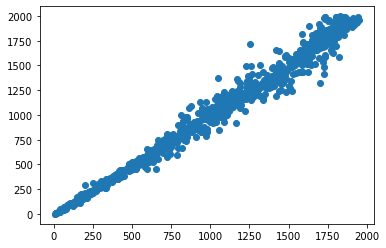

In [5]:
# training and testing data
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.scatter(y_pred,y_test);

In [6]:
model.score(x_test,y_test)

0.9797782613856747

### California housing model  

In [3]:
data = pd.read_csv('data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [4]:
data.fillna(value=data.total_bedrooms.mean(),inplace=True)

In [5]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop('median_house_value',axis=1)
Y = data.median_house_value

X_transformed = pd.get_dummies(X)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.2)

In [13]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6586266582011358

In [12]:
from sklearn.svm import SVR
model2 = SVR(kernel='linear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.35108058267208153

In [14]:
# Best fit model 
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=10)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.8075035966025581

In [22]:
from sklearn.linear_model import Lasso
model4 = Lasso(max_iter=2000)
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+12, tolerance: 2.188e+10
  model = cd_fast.enet_coordinate_descent(


0.6587221705479223

In [23]:
from sklearn.linear_model import ElasticNet
model5 = ElasticNet()
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.6254105436410553

### Choosing a model for heart disease model 

In [7]:
data = pd.read_csv('data/heart.csv')
from sklearn.model_selection import train_test_split
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = data.drop('target',axis=1)
Y = data.target

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [37]:
np.random.seed(40)
from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7045454545454546

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)

0.9805194805194806

In [46]:
# Prediction with 'predict_proba'
clf2.predict_proba(x_test[:5])

array([[0.04, 0.96],
       [1.  , 0.  ],
       [0.87, 0.13],
       [0.13, 0.87],
       [0.97, 0.03]])

In [47]:
clf2.predict(x_test[:5])

array([1, 0, 0, 1, 0], dtype=int64)

In [48]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
599,63,0,1,140,195,0,1,179,0,0.0,2,2,2
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3
383,58,1,0,150,270,0,0,111,1,0.8,2,0,3
690,58,1,2,105,240,0,0,154,1,0.6,1,0,3
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3
